PROYECTO FINAL DE IA - MONITOREO Y ENTRENAMIENTO DE INTELIGENCIA ARTIFICIAL PARA LA PREDICCION DE ENFERMEDAD "PARKINSON" EN PACIENTES.
JOSE TORREGLOSA, JENNIFER ROA , LAUREN GONZALES
UNIVERSIDAD DEL MAGDALENA - SANTA MARTA - COLOMBIA
NOVIEMBRE - 2024



En el siguiente documento podremos visualizar una investigacion realizada por una universidad de alto prestigio(OXFORD) dicha investigacion costaba de grabaciones de señales en este caso voz por paciente para determinar cuales eran los pacientes que padecian de la enfermedad y cuales no.
Empezamos importando librerias.

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Procedemos a importar los datos brindados por un archivo ".data" que proporciona los valores de cada uno de los datos recolectados en el estudio.

In [3]:
# Importe de datos
data = pd.read_csv(r"parkinsons.data")
pd.set_option('display.max_columns', None)

In [4]:
print(data.head(10))
print(data.describe())
print(data.info())

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   
5  phon_R01_S01_6      120.552       131.162       113.787         0.00968   
6  phon_R01_S02_1      120.267       137.244       114.820         0.00333   
7  phon_R01_S02_2      107.332       113.840       104.315         0.00290   
8  phon_R01_S02_3       95.730       132.068        91.754         0.00551   
9  phon_R01_S02_4       95.056       120.103        91.226         0.00532   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0           0.00007   0.00370   0.00554     0.01109       0.04374   
1  

Para poder entender un poco mas el tema, debemos tener en cuenta los siguientes conceptos:
1. MDVP
(Hz) - Frecuencia Fundamental Promedio (Fo)
Fo (Frecuencia fundamental): Es la frecuencia promedio de las vibraciones de las cuerdas vocales al hablar. Se mide en Hertz (Hz) y se asocia con el tono de la voz. En personas con Parkinson, esta frecuencia puede estar alterada debido a la dificultad en el control vocal.
2. MDVP
(Hz) - Frecuencia Fundamental Máxima
Representa la frecuencia máxima alcanzada en una grabación de voz. Este valor puede reflejar la capacidad de control de la voz; en personas con Parkinson, la frecuencia máxima puede ser inconsistente debido a la inestabilidad vocal.
3. MDVP
(Hz) - Frecuencia Fundamental Mínima
La frecuencia mínima alcanzada durante la grabación de voz. Similar a la frecuencia máxima, puede verse afectada en personas con Parkinson, indicando posibles dificultades en la modulación de la voz.
4. Jitter - Variabilidad en la Frecuencia Fundamental
Representa la variación de la frecuencia fundamental entre ciclos vocales. En personas con voz normal, el Jitter es generalmente bajo. En el Parkinson, el Jitter puede ser elevado, indicando una inestabilidad en el tono de la voz. En este conjunto de datos se incluyen varias métricas de Jitter:

MDVP
(%), MDVP
(Abs): Medidas de Jitter en porcentajes y valores absolutos.

MDVP
: Jitter de Perturbación Relativa, mide la variación de frecuencia promediada en ciclos cercanos.

MDVP
: Jitter de Cociente de Perturbación de Período, otra métrica de variabilidad de frecuencia.

Jitter
: Doble de Perturbación Diferencial de Período, que ofrece otro ángulo para medir la variación en frecuencia.

5. Shimmer - Variabilidad en la Amplitud
Representa las variaciones en la amplitud de las ondas sonoras. Las personas con Parkinson suelen tener valores altos de Shimmer, lo cual indica variaciones en el volumen de la voz. Este conjunto de datos incluye varias medidas de Shimmer:

MDVP
, MDVP
(dB): Variación de amplitud en porcentaje y en decibelios.

Shimmer
, Shimmer
: Amplitud de Cociente de Perturbación, que mide la variabilidad en diferentes ciclos de voz.

MDVP
, Shimmer
: Medidas adicionales que evalúan la variación en amplitud entre ciclos consecutivos.

6. NHR y HNR - Relación de Ruido con Componentes Tonales en la Voz
NHR (Relación de Ruido a Armonía): Indica la cantidad de ruido en relación a los componentes armónicos (tonales) en la voz. En personas con Parkinson, este valor suele ser alto debido a la falta de claridad en el tono de voz.
HNR (Relación de Armonía a Ruido): Es la relación entre las frecuencias armónicas y el ruido en la voz. En personas con Parkinson, el HNR puede ser bajo, lo que indica una disminución en la calidad tonal de la voz.
7. status - Estado de Salud
Indica el estado de salud del individuo. Un valor de 0 representa a una persona sana y 1 representa a una persona con Parkinson.
8. RPDE y D2 - Medidas de Complejidad Dinámica No Lineal
RPDE (Medida de Entropía Recurrencia de Dinámica): Evalúa la estabilidad de las señales vocales en una serie temporal. Ayuda a capturar patrones de voz irregulares y complejos que pueden ser característicos de las personas con Parkinson.
D2 (Dimensión Correlativa): Mide la complejidad en la dinámica de la voz, basada en teoría de sistemas no lineales. Valores altos de D2 indican una mayor complejidad en la señal, a menudo observada en personas con Parkinson.
9. DFA - Exponente de Escalamiento Fractal
DFA (Análisis de Fluctuación Detrendizado): Es una medida fractal que estima cómo se distribuye el ruido y las variaciones en la señal vocal a través del tiempo. Esta métrica ayuda a identificar patrones fractales en la señal, reflejando la estabilidad del control vocal.
10. spread1, spread2, PPE - Medidas No Lineales de Variación en la Frecuencia Fundamental
spread1 y spread2: Son parámetros que cuantifican la dispersión o el ancho de banda de las frecuencias fundamentales. Ayudan a determinar la regularidad y estabilidad en la frecuencia de la voz.
PPE (Entropía de Energía Promedio): Mide la irregularidad en la energía de la voz. Valores altos en PPE pueden indicar una mayor inestabilidad vocal, característica de pacientes con Parkinson.
Estas métricas permiten obtener una imagen detallada de cómo los síntomas de Parkinson afectan la voz.

In [5]:
print(data.isnull().sum())
print(data.duplicated().sum())
print(data.shape)

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64
0
(195, 24)


Procedemos a realizar los histrogramas que necesitamos para realizar el estudio.

<Figure size 1000x500 with 0 Axes>

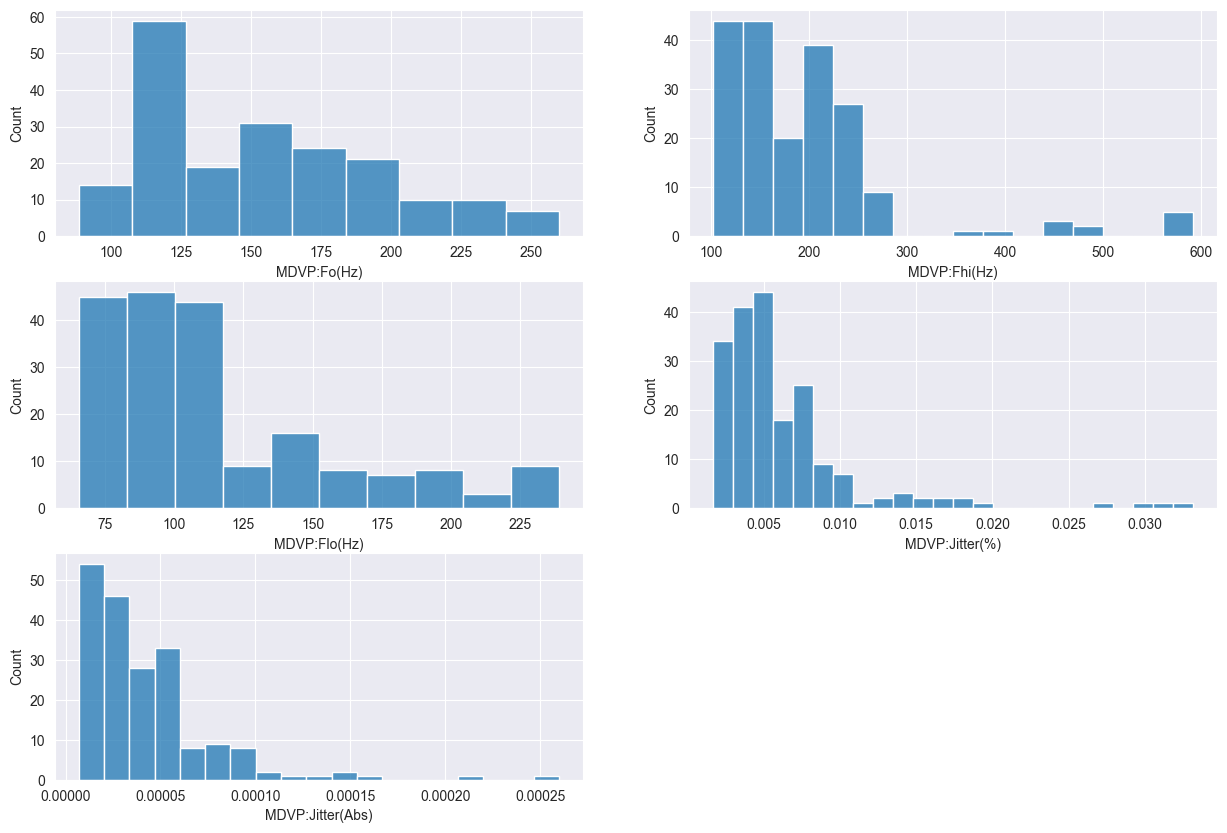

<Figure size 1000x500 with 0 Axes>

In [6]:
# EDA CON SEABORN Y MATPLOT
i = 1
plt.figure(figsize=(15, 10))
for col in data.iloc[:, 1:6].columns:
    plt.subplot(3, 2, i)
    sns.histplot(data[col])
    i = i + 1

plt.figure(figsize=(10, 5))

Reorganizamos los datos de menor a mayor.

In [7]:
print(data.sort_values(by="status", ascending=False))

               name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:P

Obtenemos el valor que nos interesa(status) el cual determina que paciente contiene informacion valiosa para el entrenamiento de la IA.

In [8]:
pd.set_option('display.max_columns', None)
print(data["status"])
print(data["status"].value_counts())

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64
status
1    147
0     48
Name: count, dtype: int64


Convertimos la columna en una lista para poder organizar bien los datos, aproximadamente son 195 grabaciones, al menos 6 grabaciones por parciente, segun informacion previa suministrada.

In [9]:
liststatus=data["status"].to_list()
print(liststatus)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Agrupamos la lista de 6 en 6, creamos subgrupos para dividirlas, para poder observar cuantos pacientes realmente existen o al menos se les pudo recolectar informacion que se encuentra plasmada en el archivo "parkinsons.data".

In [10]:
SUBLITS6= [liststatus[i:i+6] for i in range(0, len(liststatus), 6)]
for G in SUBLITS6:
    print(G)

[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 1, 1]
[1, 1, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0]


Despues de haber realizado la verificacion de cuantos pacientes validos existian y determinado que los parametros importantes a tener en cuenta serian:
Jitter y Shimmer: Capturan la inestabilidad en frecuencia y amplitud.
NHR y HNR: Reflejan la calidad tonal.
RPDE y D2: Ayudan a comprender la complejidad y variabilidad en la señal de voz.
Entonces:

In [11]:
# Lista de parametros relevantes
relevant_metrics = ["DFA", "MDVP:Jitter(%)", "MDVP:Shimmer", "NHR", "HNR", "RPDE", "D2"]

# Iterar sobre cada parametro relevante
for metric in relevant_metrics:
    # Convertir el parametro en un array de numpy
    metric_array = np.array(data[metric])
    print(f"Array de {metric}:")
    print(metric_array)
    
    # Crear subarrays de 6 elementos para el parametro actual
    SUBARRAYD6 = np.array_split(metric_array, len(metric_array) // 6)
    
    # Calcular e imprimir el promedio de cada subarray
    print(f"Promedios de {metric} en bloques de 6:")
    for subarray in SUBARRAYD6:
        promedio = np.mean(subarray)
        print(promedio)
        print(subarray)
    print()  # Espacio en blanco entre parametros



Array de DFA:
[0.815285 0.819521 0.825288 0.819235 0.823484 0.825069 0.764112 0.763262
 0.773587 0.798463 0.776156 0.79252  0.646846 0.665833 0.654027 0.658245
 0.644692 0.605417 0.719467 0.68608  0.704087 0.698951 0.679834 0.686894
 0.732479 0.737948 0.720916 0.726652 0.676258 0.723797 0.741367 0.742055
 0.738703 0.742133 0.741899 0.742737 0.778834 0.783626 0.766209 0.758324
 0.765623 0.759203 0.654172 0.634267 0.635285 0.638928 0.631653 0.635204
 0.733659 0.754073 0.775933 0.760361 0.766204 0.785714 0.819032 0.811843
 0.821364 0.817756 0.813432 0.817396 0.678874 0.686264 0.694399 0.683296
 0.673636 0.681811 0.720908 0.729067 0.731444 0.727313 0.730387 0.733232
 0.762959 0.789532 0.815908 0.807217 0.789977 0.81634  0.779612 0.790117
 0.770466 0.778747 0.787896 0.772416 0.729586 0.727747 0.712199 0.740837
 0.743937 0.745526 0.733165 0.71436  0.734504 0.69779  0.71217  0.705658
 0.693429 0.714485 0.690892 0.674953 0.656846 0.643327 0.641418 0.722356
 0.691483 0.719974 0.67793  0.700246 

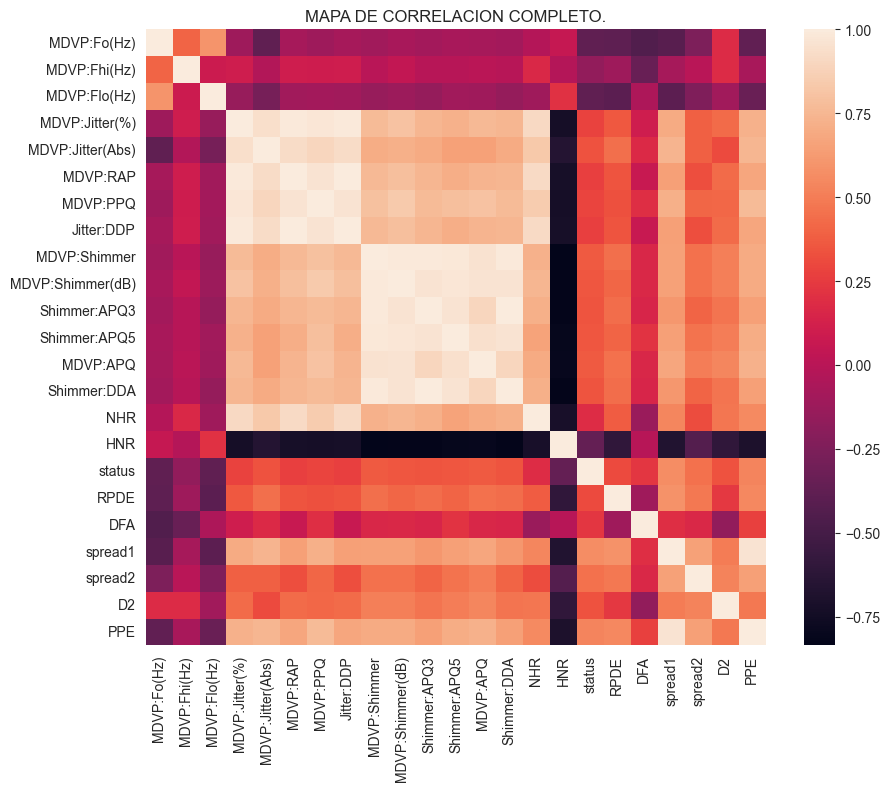

In [12]:
# Discriminacion de float a int.
numeric_data = data.select_dtypes(include=[float, int])
# CORRELACION 
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=False)
plt.title("MAPA DE CORRELACION COMPLETO.")
plt.show()

In [39]:
# Detección de características correlacionadas
def corr_feature_detect(data, threshold=0.95):
    corrmat = data.corr()
    corrmat = corrmat.abs().unstack()  # valor absoluto de coeficiente de correlación
    corrmat = corrmat.sort_values(ascending=False)
    corrmat = corrmat[corrmat >= threshold]
    corrmat = corrmat[corrmat < 1]  # excluir la diagonal
    corrmat = pd.DataFrame(corrmat).reset_index()
    corrmat.columns = ['feature1', 'feature2', 'corr']
   
    grouped_feature_ls = []
    correlated_groups = []
    
    for feature in corrmat.feature1.unique():
        if feature not in grouped_feature_ls:
            # encontrar todas las características correlacionadas con una sola característica
            correlated_block = corrmat[corrmat.feature1 == feature]
            grouped_feature_ls = grouped_feature_ls + list(
                correlated_block.feature2.unique()) + [feature]
    
            # agregar el bloque de características a la lista
            correlated_groups.append(correlated_block)
    return correlated_groups

# Excluir las columnas no numéricas o de clase para el análisis de correlación
data_for_corr = data.drop(columns=['name', 'status'])

# Ejecutar la función para detectar características correlacionadas
correlated_features = corr_feature_detect(data=data_for_corr, threshold=0.95)

# Imprimir los grupos de características correlacionadas
for group in correlated_features:
    print(group, '\\n')


       feature1          feature2      corr
0   Shimmer:DDA      Shimmer:APQ3  1.000000
8   Shimmer:DDA      MDVP:Shimmer  0.987626
20  Shimmer:DDA  MDVP:Shimmer(dB)  0.963202
28  Shimmer:DDA      Shimmer:APQ5  0.960072 \n
      feature1        feature2      corr
2   Jitter:DDP        MDVP:RAP  1.000000
5   Jitter:DDP  MDVP:Jitter(%)  0.990276
33  Jitter:DDP        MDVP:PPQ  0.957319 \n
   feature1 feature2      corr
24  spread1      PPE  0.962435 \n
    feature1          feature2      corr
26  MDVP:APQ  MDVP:Shimmer(dB)  0.960977
36  MDVP:APQ      MDVP:Shimmer  0.950083 \n


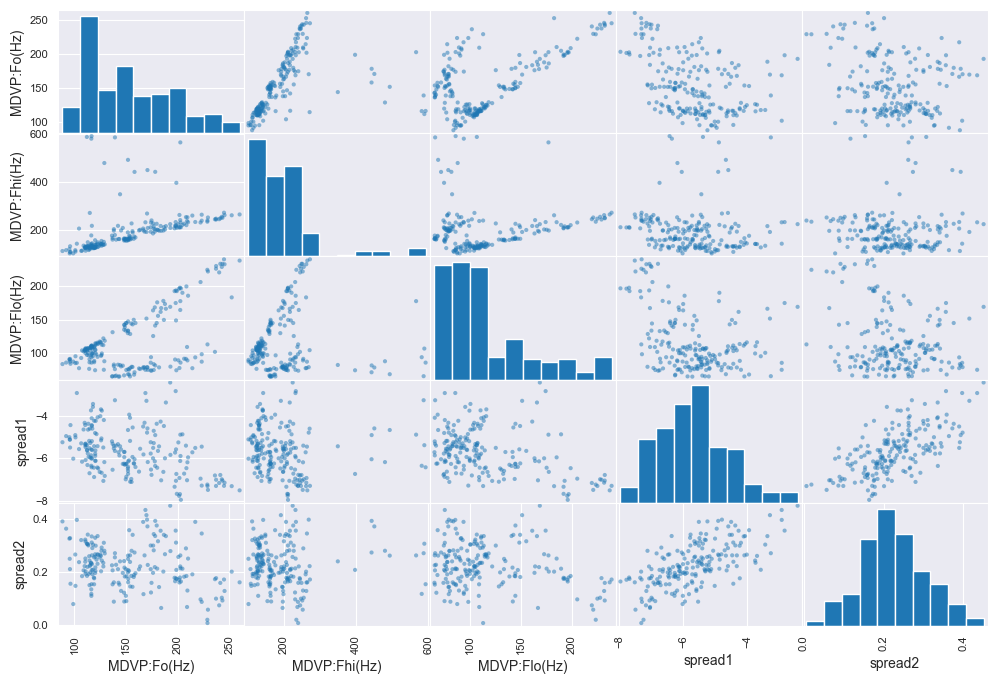

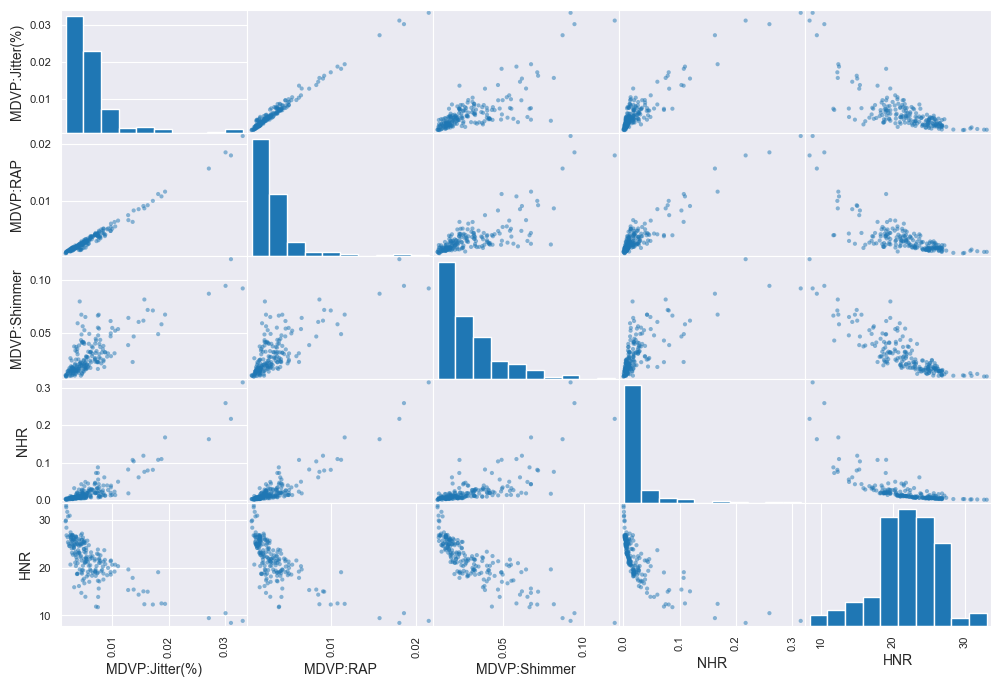

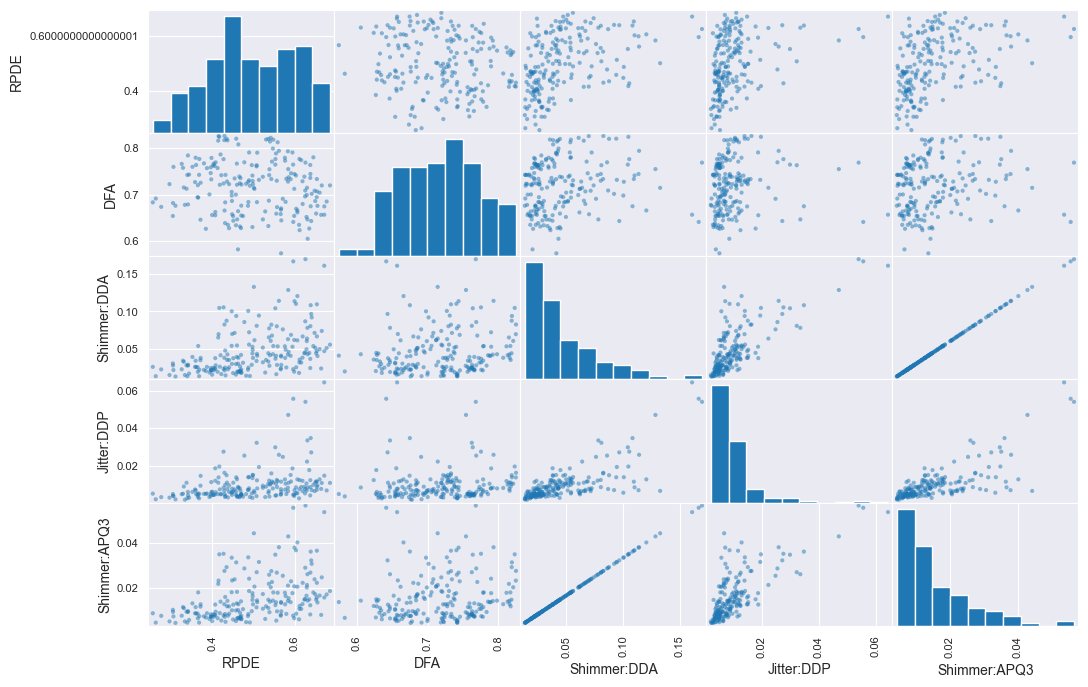

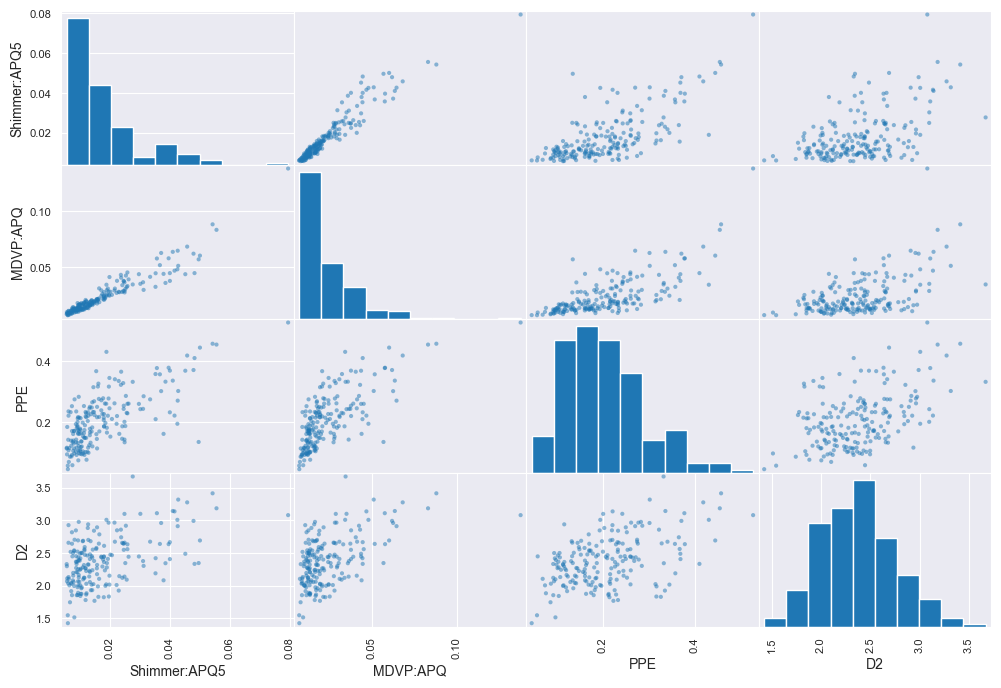

In [43]:
from pandas.plotting import scatter_matrix

# Selección de columnas para el gráfico de dispersión
cols = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'spread1', 'spread2']  # Cambia estas columnas según tus datos
scatter_matrix(data[cols], figsize=(12, 8))
plt.show()
# Seleccion de columnas de variables que se deberian eliminar.
cols2= ["MDVP:Jitter(%)","MDVP:RAP","MDVP:Shimmer","NHR","HNR"]
cols3=["RPDE","DFA","Shimmer:DDA","Jitter:DDP","Shimmer:APQ3"]
cols4=["Shimmer:APQ5","MDVP:APQ","PPE","D2"]
scatter_matrix(data[cols2], figsize=(12, 8))
plt.show()
scatter_matrix(data[cols3], figsize=(12, 8))
plt.show()
scatter_matrix(data[cols4], figsize=(12, 8))
plt.show()

In [31]:
from sklearn.linear_model import LassoCV, LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.feature_selection import SelectFromModel

In [32]:
# Separar características (excluyendo 'name' y 'status') y la variable objetivo 'status'
X = data.drop(columns=['name', 'status'])  # Características
y = data['status']                         # Variable objetivo
# Normalizamos las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
# Definir el modelo LassoCV para encontrar el mejor valor de alpha
lasso_cv = LassoCV(cv=5)
# Ajustar el modelo a las características y al objetivo
lasso_cv.fit(X_scaled, y)
# Obtener las características seleccionadas con coeficientes distintos de cero
selected_features = X.columns[(lasso_cv.coef_ != 0)]
# Crear una matriz de correlación reducida con las características seleccionadas
correlation_matrix = X[selected_features].corr()
print("Variables seleccionadas por Lasso:")
print(selected_features)
print("\nMatriz de correlación reducida:")
print(correlation_matrix)

Variables seleccionadas por Lasso:
Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'DFA', 'spread1',
       'spread2', 'D2'],
      dtype='object')

Matriz de correlación reducida:
              MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)       DFA   spread1  \
MDVP:Fo(Hz)      1.000000      0.400985      0.596546 -0.446013 -0.413738   
MDVP:Fhi(Hz)     0.400985      1.000000      0.084951 -0.343097 -0.076658   
MDVP:Flo(Hz)     0.596546      0.084951      1.000000 -0.050406 -0.394857   
DFA             -0.446013     -0.343097     -0.050406  1.000000  0.195668   
spread1         -0.413738     -0.076658     -0.394857  0.195668  1.000000   
spread2         -0.249450     -0.002954     -0.243829  0.166548  0.652358   
D2               0.177980      0.176323     -0.100629 -0.165381  0.495123   

               spread2        D2  
MDVP:Fo(Hz)  -0.249450  0.177980  
MDVP:Fhi(Hz) -0.002954  0.176323  
MDVP:Flo(Hz) -0.243829 -0.100629  
DFA           0.166548 -0.165381  
spread1       0.65235

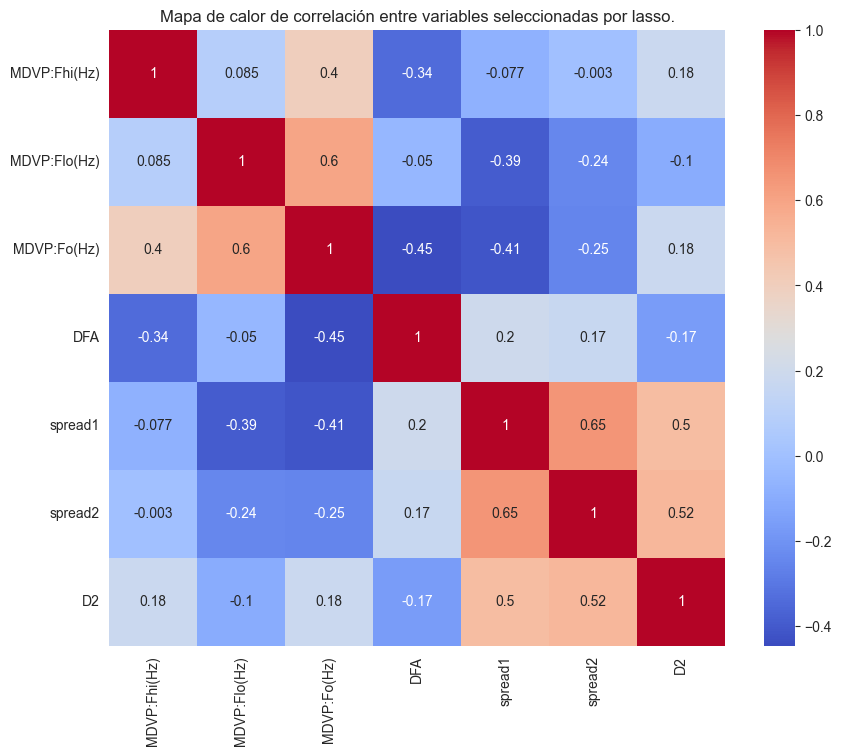

In [34]:
columnas_lasso = ["MDVP:Fhi(Hz)", "MDVP:Flo(Hz)", "MDVP:Fo(Hz)", "DFA", "spread1", "spread2", "D2"]
datos_seleccionados2 = data[columnas_lasso]

# Calcula la matriz de correlación entre las columnas seleccionadas por lasso
correlacion2 = datos_seleccionados2.corr()

# Visualiza el heatmap de la correlación de lasso
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion2, annot=True, cmap='coolwarm', square=True)
plt.title("Mapa de calor de correlación entre variables seleccionadas por lasso.")
plt.show()

In [35]:
# ---- Selección de características con Softmax ----
softmax_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
softmax_model.fit(X_scaled, y)

# Extraer coeficientes del modelo Softmax
softmax_coefficients = np.abs(softmax_model.coef_).mean(axis=0)

# Obtener características importantes de Softmax (con coeficientes más altos)
selected_features_softmax = X.columns[softmax_coefficients > np.median(softmax_coefficients)]

In [36]:
print("\nVariables seleccionadas por Softmax (coeficientes más altos):")
print(selected_features_softmax)


Variables seleccionadas por Softmax (coeficientes más altos):
Index(['MDVP:Fo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP',
       'MDVP:PPQ', 'Jitter:DDP', 'MDVP:APQ', 'spread1', 'spread2', 'D2',
       'PPE'],
      dtype='object')


In [37]:
print("Variables seleccionadas por Lasso:")
print(selected_features)

Variables seleccionadas por Lasso:
Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'DFA', 'spread1',
       'spread2', 'D2'],
      dtype='object')


Adaptacion al codigo de la profesora.


In [38]:
# ---- Selección de características con regresión logística L1 ----
# Definir el modelo con regularización L1
log_reg = LogisticRegression(C=1, penalty='l1', solver='saga', max_iter=1000)

# Usar SelectFromModel para seleccionar características
selector = SelectFromModel(log_reg)
selector.fit(X_scaled, y)

# Obtener las características seleccionadas
selected_features = X.columns[(selector.get_support())]

# Imprimir resultados
print('Total de características:', X.shape[1])
print('Características seleccionadas:', len(selected_features))
print('Características seleccionadas por L1:')
print(selected_features)

# Contar cuántas características fueron descartadas (coeficientes en cero)
print('Características con coeficientes reducidos a cero:',
      np.sum(selector.estimator_.coef_ == 0))

# Mostrar las características que fueron descartadas
print('Características no seleccionadas:')
print(set(X.columns) - set(selected_features))


Total de características: 22
Características seleccionadas: 13
Características seleccionadas por L1:
Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:APQ', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')
Características con coeficientes reducidos a cero: 9
Características no seleccionadas:
{'MDVP:Shimmer(dB)', 'Shimmer:APQ5', 'MDVP:Shimmer', 'MDVP:PPQ', 'MDVP:RAP', 'NHR', 'Shimmer:DDA', 'Shimmer:APQ3', 'Jitter:DDP'}
